[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Train Soccer Pitch Keypoint Detector

---

[![Download Dataset](https://app.roboflow.com/images/download-dataset-badge.svg)](https://universe.roboflow.com/roboflow-jvuqo/football-field-detection-f07vi)

This notebook is based on the [How to Train a YOLOv8 Keypint Detection Model](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-keypoint.ipynb) notebook from the [roboflow/notebooks](https://github.com/roboflow/notebooks) repository.

## Configure API keys

- Open your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat Dec 28 09:05:51 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.58.02              Driver Version: 555.58.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
|  0%   38C    P8             17W /  295W |     396MiB /  16376MiB |     19%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

from dotenv import load_dotenv
load_dotenv()

/home/shan/proj/sports/examples/soccer/notebooks


True

## Install dependencies

In [3]:
!pip install -q ultralytics roboflow


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Imports

In [4]:
from roboflow import Roboflow
# from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("roboflow-jvuqo").project("football-field-detection-f07vi")
version = project.version(12)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/home/shan/proj/sports/examples/soccer/notebooks/datasets’: File exists
/home/shan/proj/sports/examples/soccer/notebooks/datasets
loading Roboflow workspace...
loading Roboflow project...


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [6]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Custom training

In [ ]:
%cd {HOME}

# !yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=14 epochs=800 imgsz=[768,432] mosaic=0.0 perspective=0.001 plots=True
!yolo task=pose mode=train model={HOME}/runs/pose/train10/weights/last.pt data={dataset.location}/data.yaml batch=12 patience=2000 epochs=2000 imgsz=[768,432] degrees=10 translate=0.4 scale=0.2 perspective=0.001 mosaic=0.0 plots=True lr0=0.0001

/home/shan/proj/sports
/home/shan/proj/sports/examples/soccer/notebooks/venv/lib/python3.8/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feat

In [55]:
HOME = os.getcwd()
# HOME = os.getcwd() + '/../../..'
!ls {HOME}/runs/pose/train10/

args.yaml			 labels.jpg	   train_batch1.jpg
BoxF1_curve.png			 PoseF1_curve.png  train_batch2.jpg
BoxP_curve.png			 PoseP_curve.png   val_batch0_labels.jpg
BoxPR_curve.png			 PosePR_curve.png  val_batch0_pred.jpg
BoxR_curve.png			 PoseR_curve.png   val_batch1_labels.jpg
confusion_matrix_normalized.png  results.csv	   val_batch1_pred.jpg
confusion_matrix.png		 results.png	   weights
labels_correlogram.jpg		 train_batch0.jpg


/home/shan/proj/sports


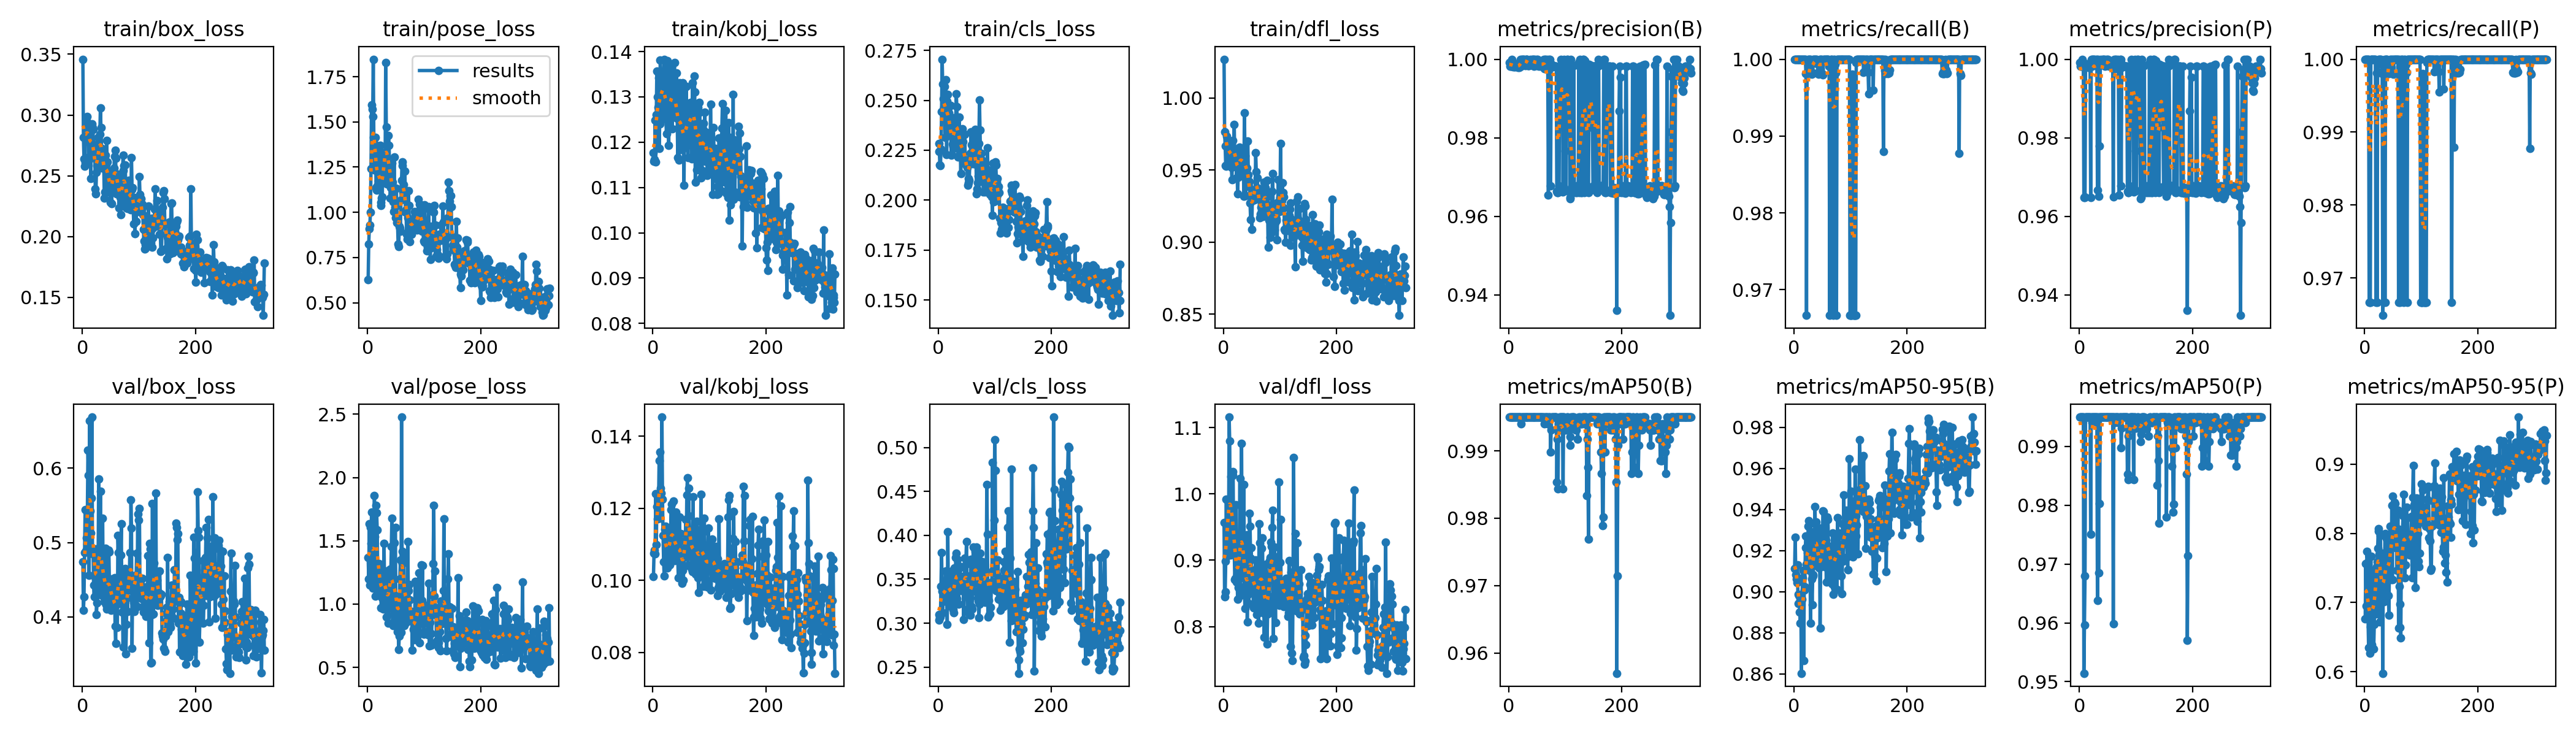

In [56]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train10/results.png', width=600)

/home/shan/proj/sports


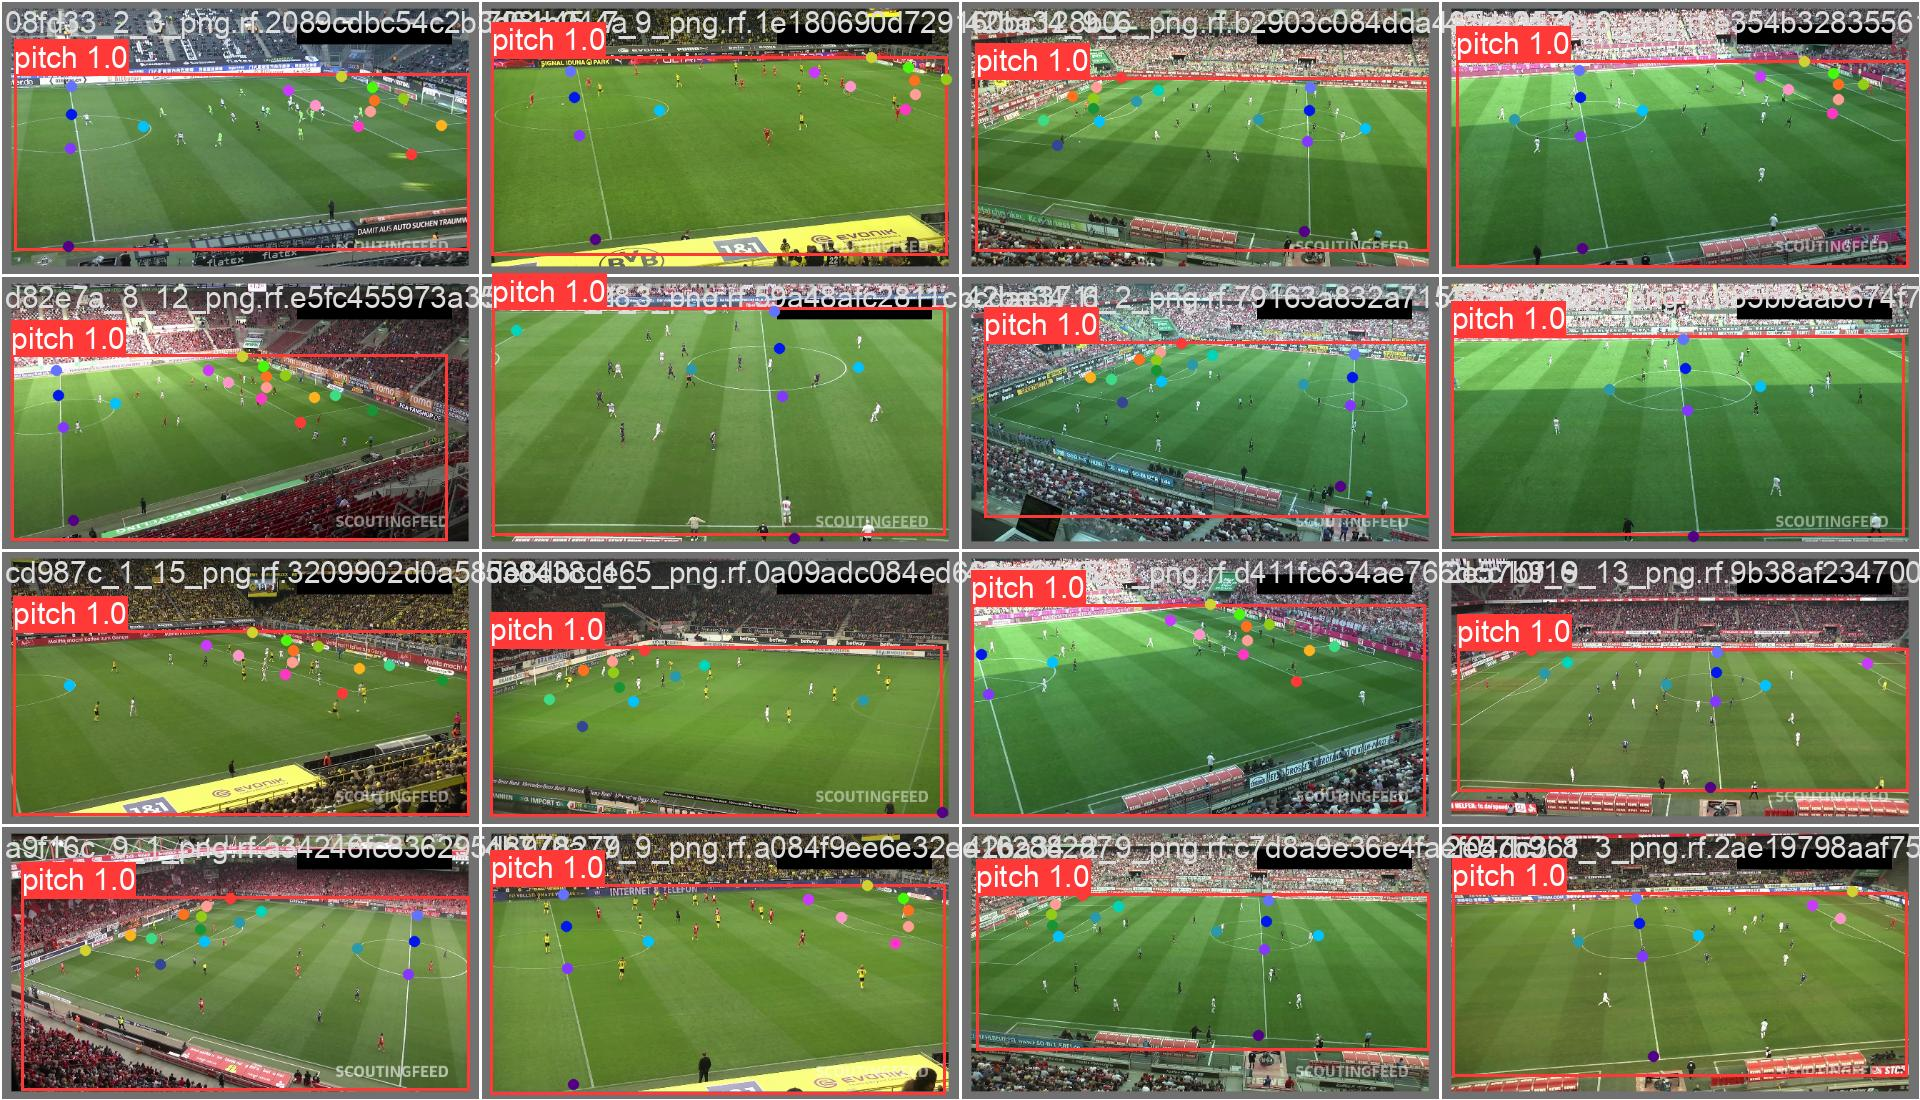

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train3/val_batch0_pred.jpg', width=600)

## Validate custom model

In [43]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train6/weights/best.pt data={dataset.location}/data.yaml

/home/shan/proj/sports
/home/shan/proj/sports/examples/soccer/notebooks/venv/lib/python3.8/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feat

## Deploy model on Roboflow

In [14]:
project.version(dataset.version).deploy(model_type="yolov8-pose", model_path=f"{HOME}/runs/pose/train/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/roboflow-jvuqo/football-field-detection-f07vi/12/uploadModel?api_key=qlsh7ovL6p10ciT0pALM&modelType=yolov8-pose&nocache=true
